# **Hands On Machine Learning**
<img src='https://camo.githubusercontent.com/94a049471be2eb7c49f5d3673345c623b7c3d2da7f237f8aa81aafa022e71bb3/68747470733a2f2f6d2e6d656469612d616d617a6f6e2e636f6d2f696d616765732f492f37315546396d444158334c2e5f41435f5546313030302c313030305f514c38305f2e6a7067' width=20%>

**Today we will master Classification**<br>
for this purpose we will use MNIST dataset.<br>
<img src='https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png'>

In [37]:
import numpy as np
from sklearn.datasets import fetch_openml

In [38]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [39]:
X, y = mnist.data, mnist.target

In [40]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [41]:
X.shape

(70000, 784)

In [42]:
y.shape

(70000,)

In [43]:
import matplotlib.pyplot as plt

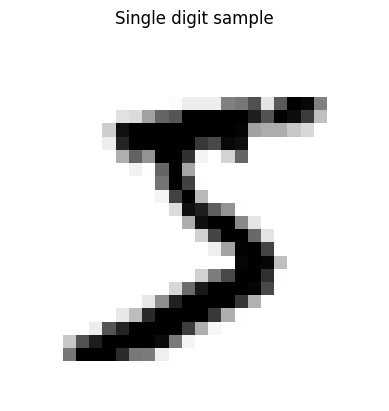

In [44]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.title('Single digit sample')
  plt.imshow(image, cmap='binary')
  plt.axis('off')

plot_digit(X[0]);

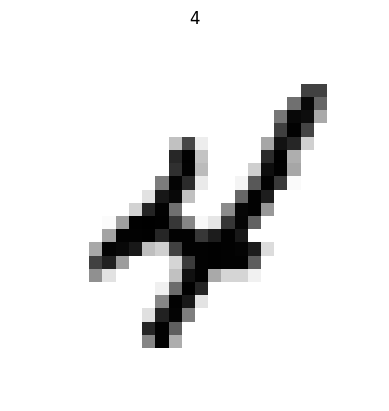

In [45]:
def plot_digit_by_idx(index):
  image = X[index].reshape(28, 28)
  plt.title(y[index])
  plt.imshow(image, cmap='binary')
  plt.axis('off')

plot_digit_by_idx(9);

In [46]:
X_train = X[:60_000]
y_train = y[:60_000]

X_test = X[60_000:]
y_test = y[60_000:]

# **BINARY CLASSIFICATION**
> let's classify whether digit is 5 or not.

In [47]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

Good point to start with is SGDClassifier as it's simple and efficient (it can work with Large Datasets)

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

[ True]


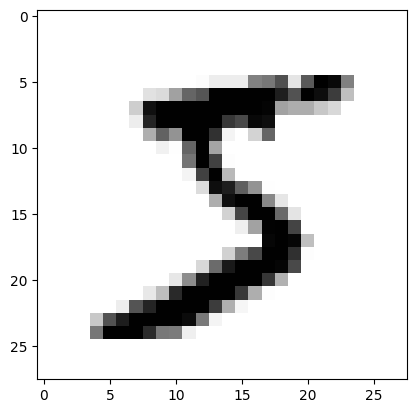

In [50]:
# let's predict something!

print(sgd_clf.predict([X_train[0]]))
plt.imshow(X_train[0].reshape(28, 28), cmap='binary');

# True is true!
# However let's measure our success with real metrics

**Performance Measurement**

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Wow! That's very cool...<br>
## **NO**<br>
Let's check out simple dummy classifier that classifies all samples as the most frequent class

In [52]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

print(any(dummy_clf.predict(X_train)))

False


In [53]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

<img src='https://media.tenor.com/H9hzH9fLh3wAAAAi/upal-roflan-upal.gif'>

In [54]:
import seaborn as sns

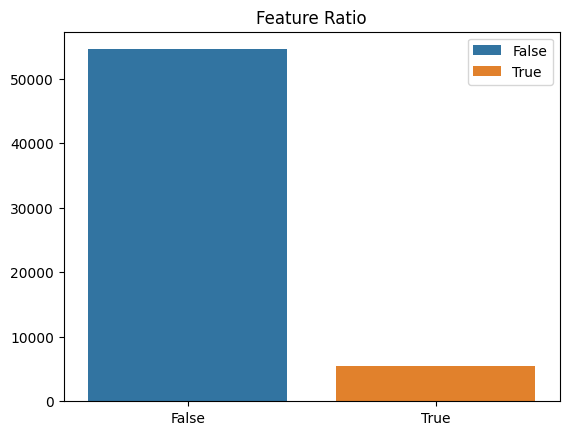

In [69]:
unique, counts = np.unique(y_train_5, return_counts=True)
category_counts = dict(zip(unique, counts))

plt.title('Feature Ratio')
sns.barplot(x=category_counts.keys(),
            y=category_counts.values(),
            hue=category_counts.keys());

Bro...<br>
Working with <u>skewed</u> datasets we should better use Confusion Matrix

In [70]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

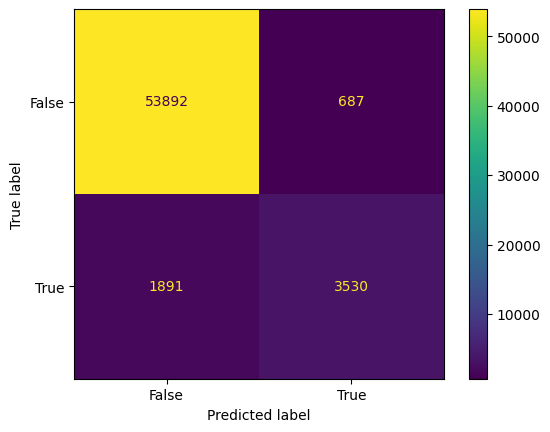

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_clf.classes_)
disp.plot();

In [77]:
from sklearn.metrics import f1_score

In [78]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Precision Recall Tradeoff:

In [83]:
y_scores = sgd_clf.decision_function([X_train[0]])  # 5
y_scores

array([2164.22030239])

It gives us particular score that model has.<br>
In such way we can set our own threshold and compare value to it

In [84]:
threshold = 0
y_digit_pred = (y_scores > threshold)
y_digit_pred  # it classifies it as 5!

array([ True])

In [82]:
y_scores = sgd_clf.decision_function([X_train[9]])  # not 5
y_scores

array([-4081.33692831])

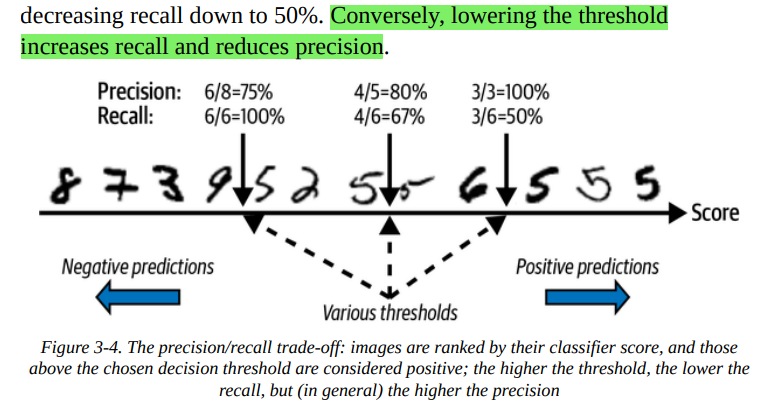